In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
DATA_DIR = '../../datasets/NNN/unit_data_full.pkl'
dat = pd.read_pickle(DATA_DIR)
print(f'Sucessfully loaded data for {len(dat)} units!')

Sucessfully loaded data for 30493 units!


In [18]:
np.min(dat['F_SI']), np.max(dat['F_SI'])

(np.float64(-3.483745813369751), np.float64(5.77348518371582))

In [32]:
# img_psth = dat['img_psth'].iloc[0]

# ONSET_TIME = 50
# RESPONSE_WIN = slice(ONSET_TIME + 50, ONSET_TIME + 220)
# BASELINE_WIN = slice(ONSET_TIME - 50, ONSET_TIME + 0)

# # baseline normed response to 1072 different images
# normed_response = img_psth[RESPONSE_WIN, 1000:].mean(axis=0) - img_psth[BASELINE_WIN, 1000:].mean(axis=0)

# stats.ttest_rel(img_psth[RESPONSE_WIN, 1000:].mean(axis=0), img_psth[BASELINE_WIN, 1000:].mean(axis=0))
ONSET_TIME = 50
RESP_WIN = slice(ONSET_TIME + 50, ONSET_TIME + 220)
BASE_WIN = slice(ONSET_TIME - 50, ONSET_TIME + 0)
IMG_SLICE = slice(1000, None)

def unit_pvalue(A):
    A = np.asarray(A)
    resp = A[RESP_WIN, IMG_SLICE].mean(axis=0)
    base = A[BASE_WIN, IMG_SLICE].mean(axis=0)
    m = np.isfinite(resp) & np.isfinite(base)
    if m.sum() < 2:
        return np.nan
    return stats.ttest_rel(resp[m], base[m]).pvalue

dat['p_value'] = [unit_pvalue(A) for A in dat['img_psth']]

0        0.071510
1        0.694731
2        0.099847
3        0.684799
4        0.787400
           ...   
30488    0.060792
30489    0.874940
30490    0.243299
30491    0.806797
30492    0.160663
Name: p_value, Length: 30493, dtype: float64

Text(0.5, 1.0, 'B_SI')

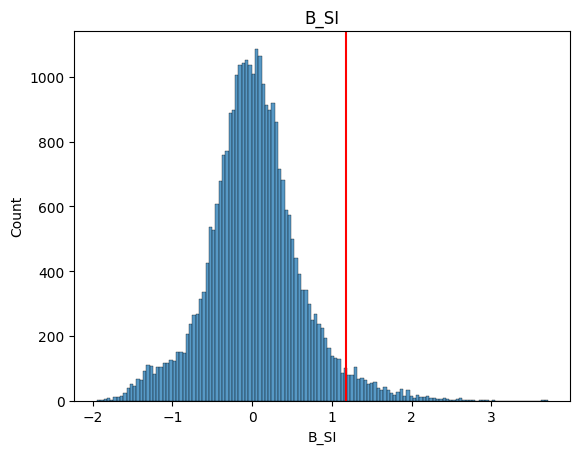

In [50]:
sel = 'B_SI'
fig,ax = plt.subplots(1,1)
sns.histplot(dat[sel])
cutoff = np.sqrt(np.var(dat[sel])) * 2
ax.axvline(x=cutoff, color='red')
ax.set_title(sel)

/var/folders/nz/k0v468mj4w5_mx5nsmsgbwwc0000gq/T/ipykernel_95931/537867440.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['all', 'p<0.05', 'F_SI', 'F_SI + p', 'B_SI', 'B_SI + p', 'O_SI', 'O_SI + p'])


Text(0.5, 1.0, 'Number of units in dataset')

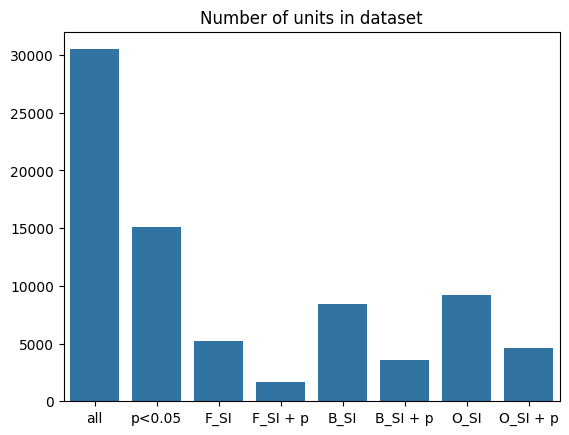

In [72]:
# dat[(dat['p_value']>0.05) & (dat['F_SI']>cutoff)]

fig, ax = plt.subplots(1,1)

sizes = [len(dat)]
inc = np.sum(dat['p_value']>0.05)
sizes.append(inc)
for sel in ['F_SI', 'B_SI', 'O_SI']:
    # cutoff based on n standard deviations
    cutoff = np.sqrt(np.var(dat[sel])) * 0.5
    sizes.append(np.sum(dat[sel]>cutoff))
    sizes.append(np.sum((dat['p_value']>0.05) & (dat[sel]>cutoff)))

sns.barplot(sizes, ax=ax)
ax.set_xticklabels(['all', 'p<0.05', 'F_SI', 'F_SI + p', 'B_SI', 'B_SI + p', 'O_SI', 'O_SI + p'])
ax.set_title('Number of units in dataset')

In [ ]:
np.mean(dat['img_psth'].iloc[0][110:270]) - np.mean(dat['avg_psth'].iloc[0][25:75])